In [1]:
### IMPORTING THE LIBRARIES

In [1]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2024-04-15 17:40:58.629605: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-15 17:40:58.629773: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-15 17:40:58.785613: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
os.listdir('/kaggle/input/covid-19/COVID-19_Radiography_Dataset')

['Lung_Opacity.metadata.xlsx',
 'Normal.metadata.xlsx',
 'README.md.txt',
 'COVID.metadata.xlsx',
 'Normal',
 'Lung_Opacity',
 'Viral Pneumonia.metadata.xlsx',
 'Viral Pneumonia',
 'COVID']

### CREATING DIRECTORY


In [3]:
len(os.listdir('/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID/images'))

3616

In [4]:
len(os.listdir('/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Lung_Opacity/images'))

6012

In [5]:
len(os.listdir('/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Viral Pneumonia/images'))

1345

In [6]:
len (os.listdir('/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Normal/images'))

10192

In [7]:
import cv2

In [17]:
img = cv2.imread('/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID/images/COVID-1002.png')

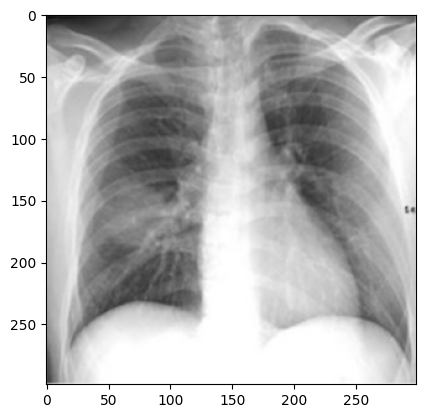

In [18]:
plt.imshow(img)

In [19]:
df = pd.read_excel('/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID.metadata.xlsx')

In [20]:
df.head()

,FILE NAME,FORMAT,SIZE,URL
0,COVID-1,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
1,COVID-2,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
2,COVID-3,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
3,COVID-4,PNG,256*256,https://sirm.org/category/senza-categoria/covi...
4,COVID-5,PNG,256*256,https://sirm.org/category/senza-categoria/covi...


In [21]:
img = '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID/images'

img

'/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID/images'

In [22]:
urls = os.listdir('/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID/images')

In [23]:
path = "COVID-19_Radiography_Dataset/COVID/images/" + urls[0]

path


'COVID-19_Radiography_Dataset/COVID/images/COVID-1994.png'

In [24]:

def loadImages(path, urls, target):
    images = []
    labels = []
    for i in range(len(urls)):
        img_path = os.path.join(path, urls[i])
        img = cv2.imread(img_path)
        img = img / 255.0
        # if we want to resize the images
        img = cv2.resize(img, (100, 100))
        images.append(img)
        labels.append(target)
    images = np.asarray(images)
    return images, labels


In [25]:
covid_path = "/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID/images"
covidUrl   = os.listdir(covid_path)
covidImages, covidTargets = loadImages(covid_path, covidUrl, 1)

In [28]:
len(covidUrl), len(covidImages)

(3616, 3616)

In [29]:
normal_path = "/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Normal/images"
normal_Url = os.listdir(normal_path)
normalImages, normalTargets = loadImages(normal_path, normal_Url, 0)

In [30]:
len(normal_Url), len(normalImages)

(10192, 10192)

In [32]:
pneumonia_path = "/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Viral Pneumonia/images"
pneumonia_Url = os.listdir(pneumonia_path)
pneumoniaImages, pneumoniaTargets = loadImages (pneumonia_path, pneumonia_Url, 2)

In [33]:
len(pneumonia_Url), len(pneumoniaImages)

(1345, 1345)

In [34]:
lungopacity_path = '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Lung_Opacity/images'
lungopacity_Url = os.listdir(lungopacity_path)
lungopacityImages,lungopacityTargets = loadImages (lungopacity_path, lungopacity_Url, 3)

In [35]:
len(lungopacity_Url), len(lungopacityImages)

(6012, 6012)

In [36]:
#covidImages = np.asarray(covidImages)
#normalImages = np.asarray(normalImages)
#pneumoniaImages = np.asarray(pneumoniaImages)
#lungopacityImages = np.asarray(lungopacityImages)

In [3]:
### vISUALISING THE IMAGES

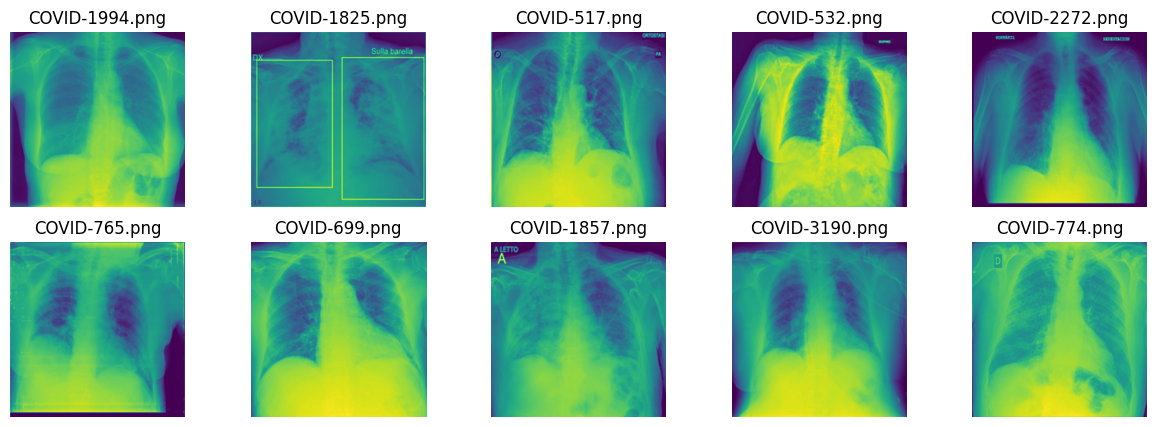

In [37]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images
directory = '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID/images'

# List the first 10 image filenames
img_filenames = os.listdir(directory)[:10]

# Plot the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(img_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directory, filename))
    plt.subplot(2, 5, i+1)  # Arrange subplots in two rows
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')  # Turn off axis labels
plt.show()


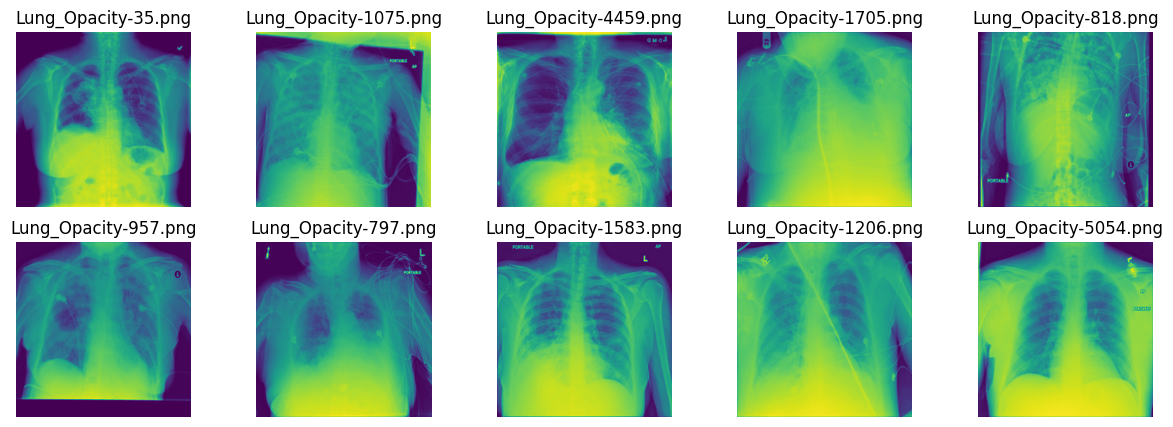

In [38]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images
directory = '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Lung_Opacity/images'

# List the first 10 image filenames
img_filenames = os.listdir(directory)[:10]

# Plot the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(img_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directory, filename))
    plt.subplot(2, 5, i+1)  # Arrange subplots in two rows
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')  # Turn off axis labels
plt.show()


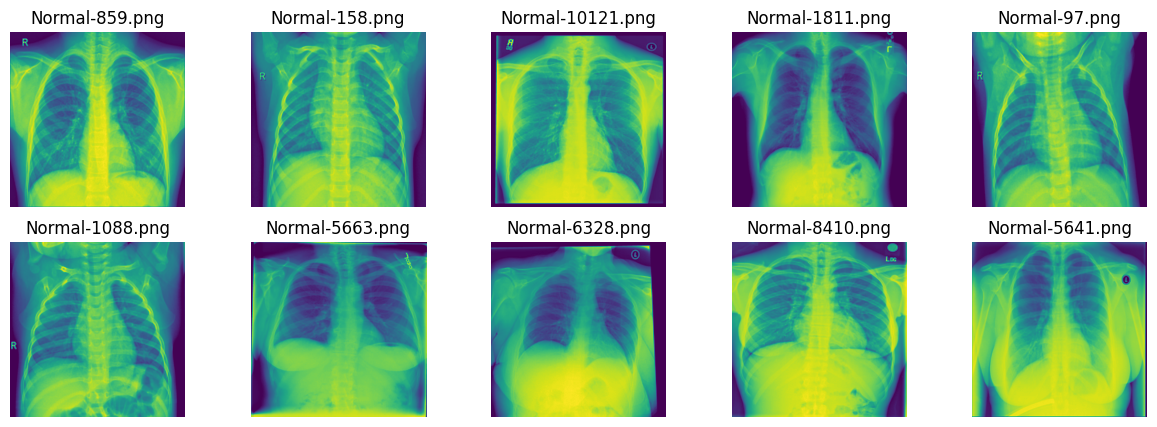

In [39]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images
directory = '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Normal/images'

# List the first 10 image filenames
img_filenames = os.listdir(directory)[:10]

# Plot the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(img_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directory, filename))
    plt.subplot(2, 5, i+1)  # Arrange subplots in two rows
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')  # Turn off axis labels
plt.show()


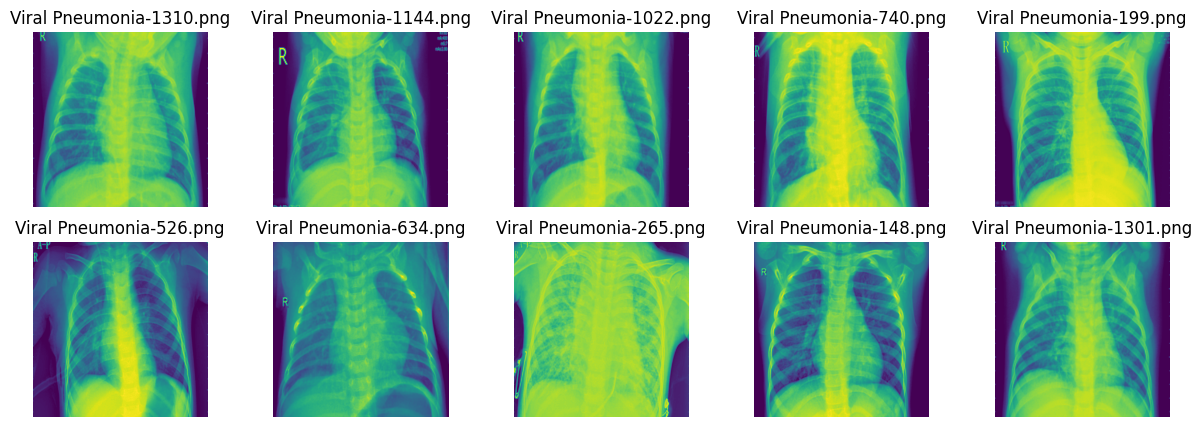

In [40]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing the images
directory = '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Viral Pneumonia/images'

# List the first 10 image filenames
img_filenames = os.listdir(directory)[:10]

# Plot the images
plt.figure(figsize=(15, 5))
for i, filename in enumerate(img_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directory, filename))
    plt.subplot(2, 5, i+1)  # Arrange subplots in two rows
    plt.imshow(img)
    plt.title(filename)
    plt.axis('off')  # Turn off axis labels
plt.show()


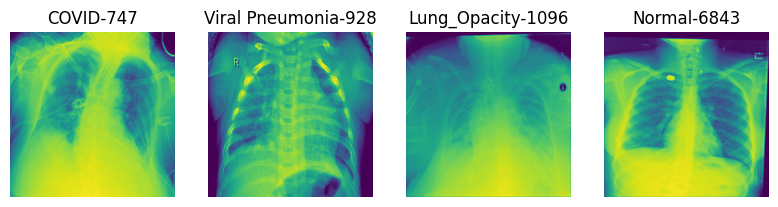

In [43]:
import random
directories = [
    '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID/images',
    '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Viral Pneumonia/images',
    '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Lung_Opacity/images',
    '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Normal/images'
]

# Initialize a list to store sampled image filenames
sampled_filenames = []

# Randomly select 1 image from each directory
for directory in directories:
    filenames = os.listdir(directory)
    sampled_filenames.append(random.choice(filenames))

# Plot the sampled images
plt.figure(figsize=(20, 10))
for i, filename in enumerate(sampled_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directories[i], filename))
    plt.subplot(4, 8, i + 1)  # Arrange subplots in a single row
    plt.imshow(img)
    plt.title(filename.split('.')[0])  # Display filename without extension
    plt.axis('off')  # Turn off axis labels
plt.show()


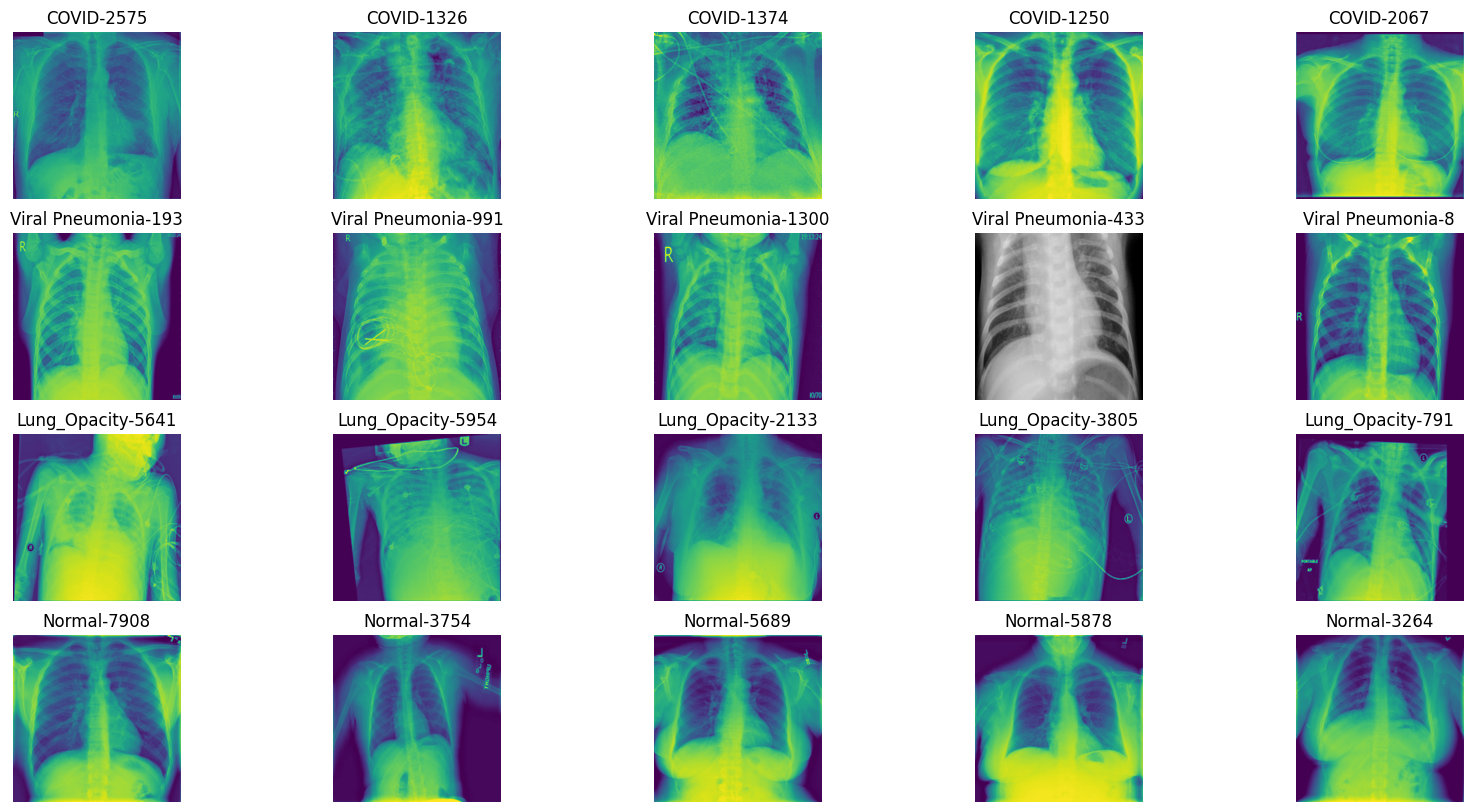

In [47]:
import random
directories = [
    '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/COVID/images',
    '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Viral Pneumonia/images',
    '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Lung_Opacity/images',
    '/kaggle/input/covid-19/COVID-19_Radiography_Dataset/Normal/images'
]

# Initialize a list to store sampled image filenames
sampled_filenames = []

# Randomly select 5 images from each directory
for directory in directories:
    filenames = os.listdir(directory)
    sampled_filenames.extend(random.sample(filenames, 5))

# Plot the sampled images
plt.figure(figsize=(20, 10))
for i, filename in enumerate(sampled_filenames):
    # Open the image using PIL
    img = Image.open(os.path.join(directories[i // 5], filename))
    plt.subplot(4, 5, i + 1)  # Arrange subplots in a grid
    plt.imshow(img)
    plt.title(filename.split('.')[0])  # Display filename without extension
    plt.axis('off')  # Turn off axis labels
plt.show()


### Data Preprocessing

In [48]:
covidImages.shape

(3616, 100, 100, 3)

In [49]:
normalImages.shape

(10192, 100, 100, 3)

In [50]:
pneumoniaImages.shape

(1345, 100, 100, 3)

In [51]:
lungopacityImages.shape

(6012, 100, 100, 3)

In [52]:
data = np.r_[covidImages, normalImages, pneumoniaImages, lungopacityImages]

In [53]:
data.shape

(21165, 100, 100, 3)

In [54]:
targets = np.r_[covidTargets, normalTargets,pneumoniaTargets, lungopacityTargets]

In [55]:
targets.shape

(21165,)

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(data, targets, test_size=0.2, random_state=42)

In [58]:
import tensorflow as tf

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

### Creating CNN model

In [60]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')  # Assuming 4 classes (covid, normal, pneumonia, lungopacity)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [61]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     1,806,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,862,980 (7.11 MB)

 Trainable params: 1,862,980 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [62]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [67]:
history = model.fit(X_train, y_train,batch_size=32,epochs=5,validation_data=(X_test, y_test))

Epoch 1/5
530/530 ━━━━━━━━━━━━━━━━━━━━ 142s 267ms/step - accuracy: 0.9348 - loss: 0.1814 - val_accuracy: 0.8814 - val_loss: 0.3575
Epoch 2/5
530/530 ━━━━━━━━━━━━━━━━━━━━ 141s 264ms/step - accuracy: 0.9477 - loss: 0.1456 - val_accuracy: 0.8781 - val_loss: 0.3967
Epoch 3/5
530/530 ━━━━━━━━━━━━━━━━━━━━ 144s 268ms/step - accuracy: 0.9564 - loss: 0.1176 - val_accuracy: 0.8670 - val_loss: 0.4357
Epoch 4/5
530/530 ━━━━━━━━━━━━━━━━━━━━ 147s 278ms/step - accuracy: 0.9702 - loss: 0.0820 - val_accuracy: 0.8757 - val_loss: 0.4961
Epoch 5/5
530/530 ━━━━━━━━━━━━━━━━━━━━ 195s 265ms/step - accuracy: 0.9721 - loss: 0.0773 - val_accuracy: 0.8729 - val_loss: 0.5283


In [64]:
y_pred = model.predict(X_test)

133/133 ━━━━━━━━━━━━━━━━━━━━ 19s 139ms/step


### Visualising the training journey

In [69]:
type(history.history)

dict

In [70]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [71]:
acc_train = history.history['accuracy']
acc_val   = history.history['val_accuracy']

loss_train = history.history['loss']
loss_val   = history.history['val_loss']

In [ ]:
plt.plot(model.history.history['accuracy'], label = 'train accuracy')
plt.plot(model.history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()
plt.show()

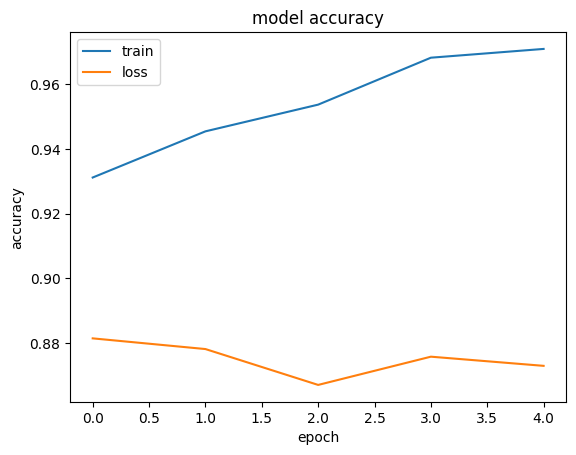

In [72]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'loss'], loc='upper left')
plt.show()

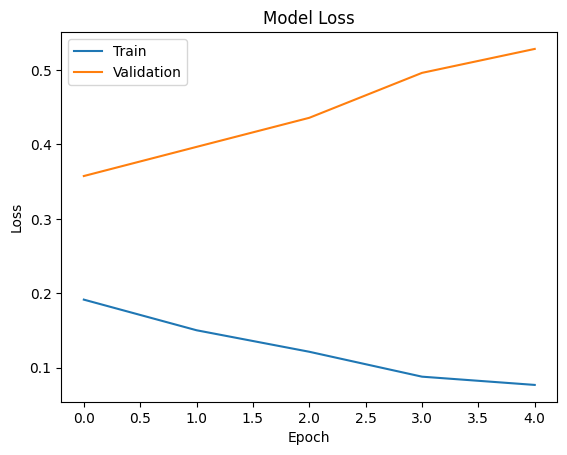

In [73]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

 In this model accuracy is 97%.
    
Achieving a 97% accuracy in a CNN model trained to classify four types of images suggests that the model is performing very well. Here's what it typically implies:

1. **High Discriminative Power**: The model has learned to distinguish between the different types of images effectively. It can correctly classify the majority of the images into their respective categories.

2. **Good Generalization**: The model is likely to generalize well to unseen data. This means that it can accurately classify new images that it hasn't been trained on, as long as they belong to one of the four categories it was trained on.

3. **Low Overfitting**: Overfitting occurs when the model performs well on the training data but poorly on unseen data. Achieving a high accuracy indicates that the model has not overfit to the training data excessively. However, it's essential to evaluate the model's performance on a separate validation set to ensure it's not overfitting.

4. **Room for Improvement**: While a 97% accuracy is excellent, there may still be room for improvement. Fine-tuning hyperparameters, experimenting with different architectures, increasing the dataset size, or using more advanced techniques like data augmentation could potentially boost the performance even further.

5. **Application Suitability**: The suitability of the model for its intended application depends on the specific requirements. In some applications, a 97% accuracy might be sufficient, while in others, it might need to be higher.

Overall, achieving a 97% accuracy in classifying four types of images using a CNN model is a promising result and indicates that the model is performing well on the task.